In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Homo 18mer

In [2]:
pdb_id = '5l93'
save_folder = '~/Documents/5l93_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

Successfully downloaded assembly file: /Users/sikao/Documents/5l93_dir/5l93-assembly1.cif.gz
Binding interfaces detected:
Chain A:
  Center of Mass (COM): (103.67906951904297, 128.27032470703125, 141.41648864746094)
  Interfaces: ['A-2', 'A-6', 'B', 'B-6', 'C']
  Interface Coordinates: 
    (113.59030151367188, 120.60269927978516, 125.68077087402344)
    Interface Energy: -0.39
    (112.19823455810547, 130.66415405273438, 125.40853118896484)
    Interface Energy: -0.39
    (96.11399841308594, 118.81888580322266, 132.38189697265625)
    Interface Energy: -6.06
    (95.59188079833984, 139.54388427734375, 149.2668914794922)
    Interface Energy: -3.11
    (88.57213592529297, 131.61471557617188, 148.409423828125)
    Interface Energy: 2.92
Chain A-2:
  Center of Mass (COM): (117.79119110107422, 106.4869155883789, 141.41648864746094)
  Interfaces: ['A', 'A-3', 'B', 'B-2', 'C-2']
  Interface Coordinates: 
    (119.97760772705078, 115.06168365478516, 125.40853881835938)
    Interface Energy: 

In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=10.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=True)

Header parsing results appear invalid, falling back to sequence alignment...
Homologous chains identified using sequence alignment:
{'A': 'A', 'B-6': 'A', 'C': 'A', 'A-5': 'A', 'B': 'A', 'C-2': 'A', 'C-3': 'A', 'B-4': 'A', 'B-2': 'A', 'C-6': 'A', 'A-4': 'A', 'A-2': 'A', 'B-3': 'A', 'B-5': 'A', 'A-3': 'A', 'C-5': 'A', 'A-6': 'A', 'C-4': 'A'}
1 homologous chain groups identified:
[['A', 'A-2', 'A-3', 'A-4', 'A-5', 'A-6', 'B', 'B-2', 'B-3', 'B-4', 'B-5', 'B-6', 'C', 'C-2', 'C-3', 'C-4', 'C-5', 'C-6']]
Multiple matches found. Using closest match: A5 (A)
Multiple conjugated matches found. Using closest match: A4 (A)
Multiple matches found. Using closest match: A5 (A)
Multiple conjugated matches found. Using closest match: A4 (A)
Multiple matches found. Using closest match: A5 (A)
Multiple conjugated matches found. Using closest match: A4 (A)
Multiple matches found. Using closest match: A5 (A)
Multiple conjugated matches found. Using closest match: A4 (A)
Multiple matches found. Using closes

PyMOL>load /Users/sikao/Documents/5l93_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/5l93_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 18 atoms.
PyMOL>color blue, name INT
 Executive: Colored 90 atoms.
PyMOL>pseudoatom com_A, pos=[103.679, 128.270, 141.416], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[113.590, 120.603, 125.681], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2,

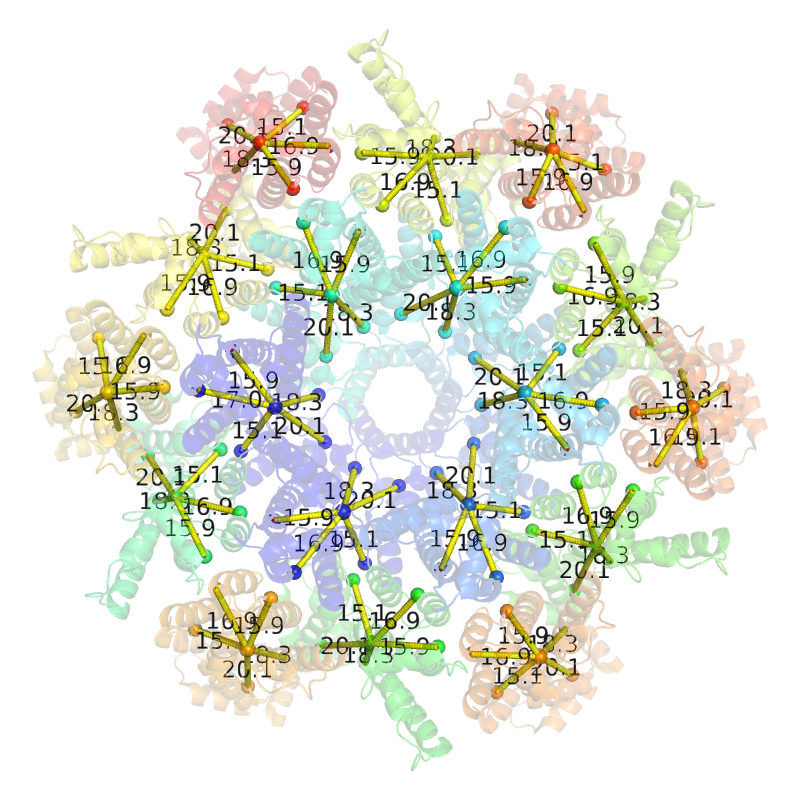

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))